In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [2]:
np.random.seed(2)
og_sample = np.random.uniform(0, 1, 50) # original sample
noise = np.random.normal(0, 0.2, og_sample.size)

In [3]:
def estimate(x, value):
    y = x**2 + 1 # generate y data
    #noise = np.random.normal(0, 0.2, x.size)
    y += noise # add noise to y
    x_sq = x**2
    xdata = np.stack((x, x_sq), axis=1)
    xdata = sm.add_constant(xdata) # 
    model = sm.OLS(y, xdata) # regress y on x and x^2 with intercept term
    results = model.fit()
    b0, b1, b2 = results.params
    if (b1**2 - 4*b2*(b0-value))>0: # return value of x if quadratic is solvable
        return (-b1 + math.sqrt(b1**2 - 4*b2*(b0-value)))/(2*b2)
    return math.sqrt(0.3) # else return true value

In [4]:
estimate(og_sample, 1.3) # estimate for x using original sample

0.5502038049139748

In [5]:
num_sim = 1000
x_values = []
for i in range(num_sim): # conduct n simulations
    data = np.random.uniform(0, 1, 50)
    x_values.append(estimate(data, 1.3))

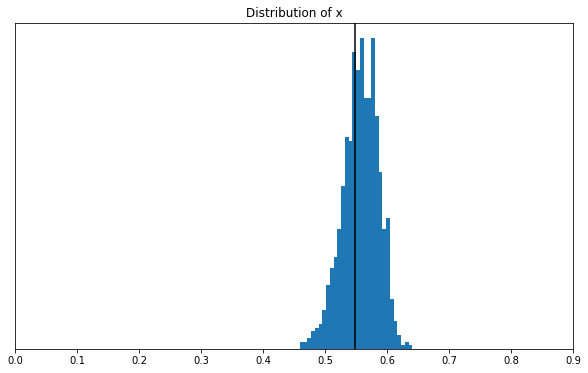

In [6]:
plt.hist(x_values, density=True, bins=30); # plot the distribution
plt.title("Distribution of x");
plt.axvline(math.sqrt(0.3), color='black');
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(10, 6);

In [7]:
x_values_bs = []
for i in range(num_sim):
    data = np.random.choice(og_sample, og_sample.size, replace=True) # bootstrap resampling
    x_values_bs.append(estimate(data, 1.3))

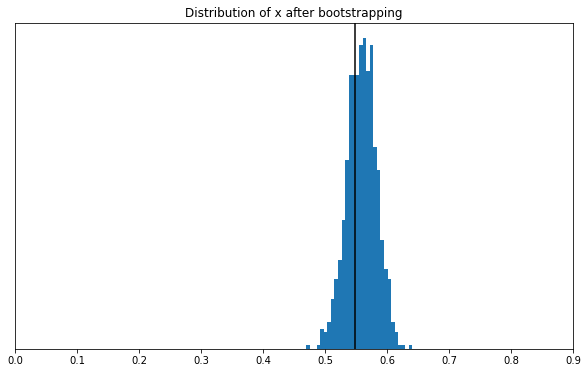

In [8]:
plt.hist(x_values_bs, density=True, bins=30); # plot the bootstrapped distribution
plt.title("Distribution of x after bootstrapping");
plt.axvline(math.sqrt(0.3), color='black');
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(10, 6);

In [9]:
print("Before bootstrapping: {}".format(np.std(x_values)))
print("After bootstrapping: {}".format(np.std(x_values_bs)))

Before bootstrapping: 0.028800906973788728
After bootstrapping: 0.02354879017662497


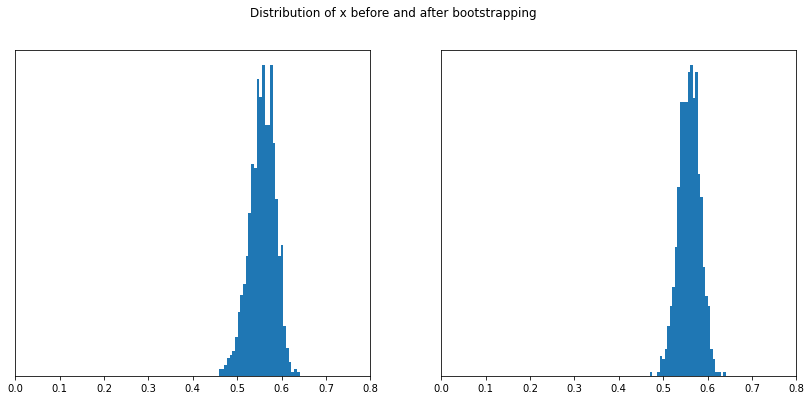

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Distribution of x before and after bootstrapping')
ax1.hist(x_values, density=True, bins=30);
ax2.hist(x_values_bs, density=True, bins=30);
ax1.set_xlim(0, 0.8)
ax1.set_yticks([])
ax2.set_xlim(0, 0.8)
ax2.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(14, 6);

In [11]:
print("Normal resampling stddev: {}".format(np.std(x_values)))
print("Bootstrapped resampling stddev: {}".format(np.std(x_values_bs)))

Normal resampling stddev: 0.028800906973788728
Bootstrapped resampling stddev: 0.02354879017662497
